In [46]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13.5, 9.0]

In [48]:
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm

In [49]:
import finance as fat

In [50]:
path = 'data/weight.csv'

In [51]:
# read and setup weight data
data = pd.read_csv(path, parse_dates=True, index_col=0)
data['Active Diet'] = data['Active Diet'].astype('bool')

In [52]:
# We want to extend our fitted trendline into the future, so add an index in the future
last_date = data.index[-1]
last_date = last_date + dt.timedelta(days=60)
data.loc[last_date, 'Weight'] = None

In [54]:
trend1_df = fat.create_fitted_line_df(data['2017-12-14':'2018-01-14'], 'Weight', 'Diet')
trend2_df = fat.create_fitted_line_df(data['2018-01-14':'2018-02-25'], 'Weight', 'No Diet')
trend3_df = fat.create_fitted_line_df(data['2018-02-25':], 'Weight', 'Diet')
trend1_df = trend1_df.append(trend3_df)

In [55]:
# ... and add 'Trend' column to data
#data = data.append(trend_df)
data = pd.DataFrame.join(data, trend1_df, how='outer')
data = data.join(trend2_df)

In [56]:
on_diet_df = data.loc[data['Active Diet'] == True]
off_diet_df = data.loc[data['Active Diet'] == False]

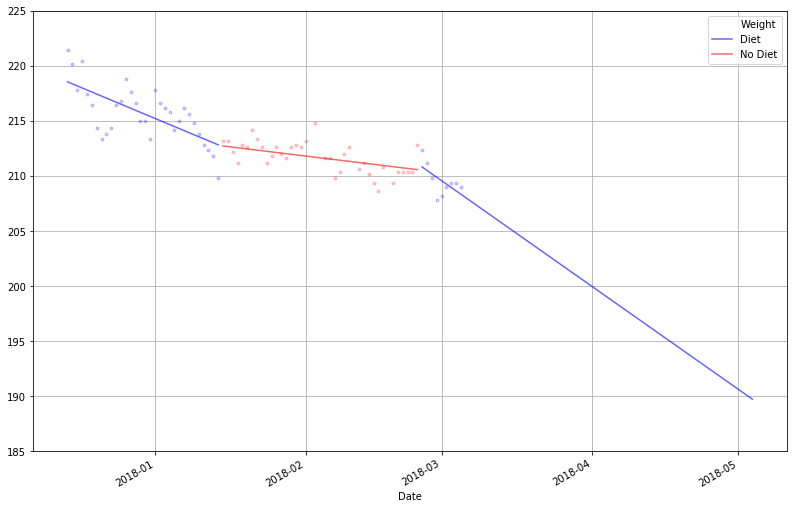

In [57]:
ax = on_diet_df['Weight'].plot(style='b.', ylim=(185,225), alpha=0.2, legend=True)
data['Diet'].plot(style='b-', alpha=0.6, legend=True)
off_diet_df['Weight'].plot(style='r.', alpha=0.2)
off_diet_df['No Diet'].plot(style='r-', alpha=0.6, legend=True)
plt.grid()